# Objetvo

El objetivo de este trabajo es recrear la arquitectura de LeNet-5 y utilizarla para reconocer digitos (dataset MNIST) .

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models,layers


Definimos la arquitectura de la red

In [4]:
le_net5 = models.Sequential()
le_net5.add(layers.Conv2D(filters = 6, kernel_size = (5,5), activation='tanh', input_shape=(32,32,1)))
le_net5.add(layers.AveragePooling2D((2,2), strides = 2))
le_net5.add(layers.Conv2D(filters = 16, kernel_size = (5,5), activation='tanh'))
le_net5.add(layers.AveragePooling2D((2,2), strides = 2))
le_net5.add(layers.Conv2D(filters = 120, kernel_size = (5,5), activation='tanh'))
le_net5.add(layers.Flatten())
le_net5.add(layers.Dense(84, activation='tanh'))
le_net5.add(layers.Dense(10, activation="softmax"))

le_net5.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'],)

le_net5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

Importamos el dataset de MNIST

11501568/11490434 [==============================] - 0s 0us/step
Dimensiones test: (10000, 28, 28)


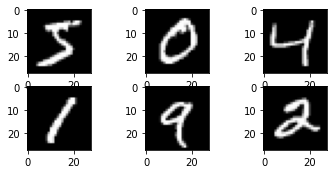

Forma tensorial datos de test (10000, 32, 32, 1)
Forma tensorial datos de train (60000, 32, 32, 1)
Clases de test (10000, 10)
Un label de train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Cargar el dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('Dimensiones test:',test_X.shape)

# Normalizamos las imágenes
train_X_n = (train_X / 255)
test_X_n = (test_X / 255) 

# Hacemos reshape de las imágenes para llevarlas a una forma tensorial
train_X_n = train_X.reshape((train_X_n.shape[0], 28, 28, 1))
test_X_n = test_X.reshape((test_X_n.shape[0], 28, 28, 1))

#aplicamos un zero padding a las imagenes para adaptarlas a la capa de entrada de la red
pad = 2
train_X_n = np.pad(train_X_n, ((0, 0), (pad,pad), (pad, pad), (0,0)), mode='constant')
test_X_n = np.pad(test_X_n, ((0, 0), (pad,pad), (pad, pad), (0,0)), mode='constant')


# transformo los labels a variables categoricas
train_y_cat = to_categorical(train_y)
test_y_cat = to_categorical(test_y)

# Plotear las primeras imágenes
for i in range(6):
	# define subplot
	plt.subplot(331 + i)
	plt.imshow(train_X[i], cmap='gray')
# show the figure
plt.show()

print('Forma tensorial datos de test',test_X_n.shape)
print('Forma tensorial datos de train',train_X_n.shape)
print('Clases de test',test_y_cat.shape)
print('Un label de train',train_y_cat[0])


Entrenamos la red.

In [6]:
le_net5.fit(
  train_X_n,
  train_y_cat,
  epochs=3,
  validation_data=(test_X_n, test_y_cat),
)

Epoch 1/3
1875/1875 [==============================] - 54s 20ms/step - loss: 0.2894 - accuracy: 0.9146 - val_loss: 0.0636 - val_accuracy: 0.9807
Epoch 2/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0482 - val_accuracy: 0.9854
Epoch 3/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0537 - val_accuracy: 0.9830


# Evaluacion del modelo

Para evaluar el desempeño de la red se utilizó un reporte automatico con diversas metricas de clasificacion provistos en la biblioteca scikitlearn




In [9]:
from sklearn.metrics import classification_report, plot_confusion_matrix

predictions = le_net5.predict(test_X_n)

predictions = np.round(predictions)

# generamos el reporte de clasificacion

print(classification_report(test_y_cat, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       1.00      0.96      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       1.00      0.96      0.98      1009

   micro avg       0.99      0.98      0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
